In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.animation as animation

In [21]:
class ConwaysGame:

    def __init__(self, grid_size=(100,100)):
        self.grid_size = grid_size
        self.grid_l = grid_size[0] # up / down
        self.grid_w = grid_size[1] # right / left
        self.init_grid()


    def init_grid(self):
        p_ones = 0.4
        self.grid = np.random.choice([0,1], self.grid_size, p=((1-p_ones),p_ones)) # seed random start 
        self.grids = []
        self.grids.append(self.grid)
        
    def lookup_neighbor_vals_deadwalls(self, i,j):
        # return right index
        neighbors_list = []
        neighbor_indices = [[i+1,j], [i-1,j],[i,j+1],[i,j-1],[i+1, j+1],[i+1,j-1],[i-1,j+1],[i-1,j-1]]
        for neighbor in neighbor_indices:
            try: 
                n_val = self.grid[neighbor[0], neighbor[1]]
            except:
                n_val = 0
            neighbors_list.append(n_val)
        return neighbors_list

    def lookup_neighbor_vals(self, i,j):
        # return right index
        neighbors_list = []

        # determining what the i and j coords of neighbors are given a periodic wrap-around space
        if i == 0:
            i_up = self.grid_l - 1
            i_down = i+1
        elif i == self.grid_l - 1:
            i_up = i - 1
            i_down = 0
        else:
            i_up = i - 1
            i_down = i + 1

        if j == 0:
            j_left = self.grid_w - 1
            j_right = j+1
        elif j == self.grid_w - 1:
            j_left = j - 1
            j_right = 0
        else:
            j_left = j - 1
            j_right = j + 1
            
        neighbor_indices = [[i_down,j], [i_up,j],[i,j_right],[i,j_left],[i_down, j_right],[i_down,j_left],[i_up,j_right],[i_up,j_left]]
        for neighbor in neighbor_indices:
            n_val = self.grid[neighbor[0], neighbor[1]]
            neighbors_list.append(n_val)
        return neighbors_list
        

    def update_cell(self, cell_i, cell_j):
        cell_val = self.grid[cell_i, cell_j]
        neighbor_vals = self.lookup_neighbor_vals(cell_i, cell_j)
        total_neighbors = np.sum(neighbor_vals)
        if cell_val==0:
            if total_neighbors==3:
                new_val = 1
            else: 
                new_val = 0
        elif cell_val==1:
            if (total_neighbors==2) | (total_neighbors==3):
                new_val = 1
            else:
                new_val = 0
        return new_val

    def update_grid(self):
        new_grid = np.zeros(self.grid_size)
        self.track_ids = []
        for i in range(0, self.grid_l):
            for j in range(0, self.grid_w):
                self.track_ids.append([i,j])
                new_grid[i,j] = self.update_cell(i,j)
        self.grid = new_grid
        self.grids.append(self.grid)

    def run_game_for_x_turns(self, x=250):
        for i in range(0, x):
            self.update_grid()
        self.turns = x

    def visualize_game(self):
        N_plots= self.turns
        fig,ax = plt.subplots()
        
        ims = []
        for i in range(0,N_plots):
            im = ax.matshow(game_obj.grids[i], animated=True)
            ims.append([im])
        ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True,
                                        repeat_delay=1000)
        writergif = animation.PillowWriter(fps=3) 
        ani.save("conway.gif")
                
        
    
        





In [22]:
game_obj = ConwaysGame()



In [23]:
game_obj.run_game_for_x_turns()

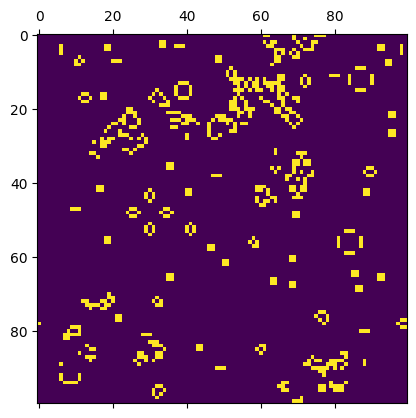

In [24]:
game_obj.visualize_game()